## 下載模組

In [ ]:
!pip install SpeechRecognition  # 語音辨識
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg  # 語音辨識
!pip install pydub  # 語音檔轉換
!pip install opencc-python-reimplemented  # 繁體、簡體中文轉換

     |████████████████████████████████| 32.8 MB 148 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd

## 匯入模組

In [ ]:
import speech_recognition as sr  # 語音辨識
import os

from pydub import AudioSegment  # 轉換檔案格式
from collections import Counter  # 計算次數用
from opencc import OpenCC  # 繁體、簡體中文轉換

## 獲取逐字稿

In [ ]:
# 創建資料夾
folder_name = ["mp3", "wav"]
for folder in folder_name:
    if not os.path.exists(folder):
        os.makedirs(folder)

### <font color=#FF3030>先把錄音檔放到 "mp3" 資料夾底下後，再去執行之後的程式碼</font>

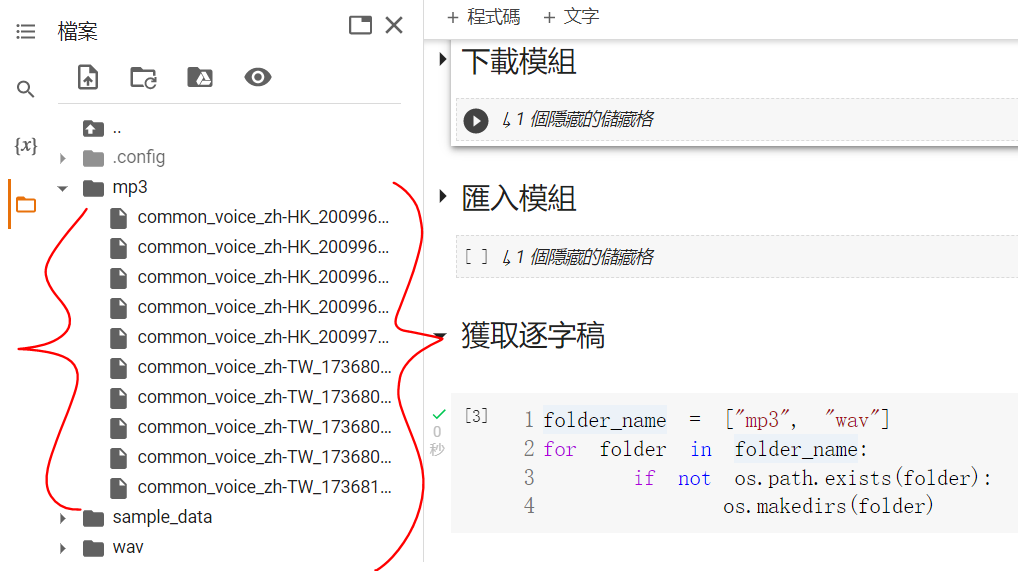

In [ ]:
# 轉存wav檔 + 語音辨識
def recognize(mp3_file:str, language:str) -> str:
    if ".mp3" not in mp3_file:
        return ""

    src = f"mp3/{mp3_file}"  # mp3檔案的位置
    dst = f"wav/{mp3_file[:-4]}.wav"  # wav檔案的位置
    audSeg = AudioSegment.from_mp3(src)
    audSeg.export(dst, format="wav")

    voice = sr.AudioFile(dst)
    with voice as source:
        audio = r.record(source)

    # 將結果轉成繁體中文後回傳 
    return s2t(r.recognize_google(audio, language=lang))  # show_all=True 顯示所有可能性

一次只能偵測一種語言 \
以下為中文跟廣東話的結果（可以發現廣東話變得很奇怪）

In [ ]:
lang = "zh-TW" # 語言
r = sr.Recognizer()
s2t = OpenCC('s2t').convert
sentences_list = [recognize(mp3_file, lang) for mp3_file in os.listdir("mp3")]

In [ ]:
sentences_list

['但是到時候你努力到死',
 '注視著你的一點機會',
 '什麼一個青菜美輝草莓',
 '登山管理處',
 '魚肝油養都會選擇簽',
 '伺服器出現異常',
 '國際牌烘乾不乾',
 '應該做自己想做的事',
 '參觀樓月餅',
 '拉麵共和國']

## 轉換成數字(用於中文)

In [ ]:
# 計算各個字的出現次數，並由多至少依序排列
count_words = Counter("".join(sentences_list)).most_common()
#count_words

In [ ]:
num_words_dict = {index+1: word[0] for index, word in enumerate(count_words)}  # 索引值: 字
words_num_dict = {word[0]: index+1 for index, word in enumerate(count_words)}  # 字: 索引值

In [ ]:
for index, sentence in enumerate(sentences_list):
    # 將各個字詞依序轉換成對應數字
    turn_to_num = [words_num_dict.get(word, 0) for word in sentence]

    sentences_list[index] = turn_to_num
sentences_list

[[9, 10, 1, 11, 12, 2, 13, 14, 1, 15],
 [16, 17, 18, 2, 3, 4, 19, 20, 5],
 [21, 22, 4, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34],
 [35, 36, 37, 38, 39, 5, 40, 41, 42],
 [43, 44, 45, 46, 47, 48, 49],
 [6, 50, 51, 52, 7, 53, 7],
 [54, 55, 8, 56, 57, 58, 8, 3, 59],
 [60, 61, 62, 63, 64],
 [65, 66, 67, 68, 6]]

In [ ]:
# 轉換回來的方法
for sentence in sentences_list:
    turn_to_sen = [num_words_dict[num] for num in sentence]
    print("".join(turn_to_sen))

但是到時候你努力到死
注視著你的一點機會
什麼一個青菜美輝草莓
登山管理處
魚肝油養都會選擇簽
伺服器出現異常
國際牌烘乾不乾
應該做自己想做的事
參觀樓月餅
拉麵共和國


## 轉換成數字(用於英文)(測試中)

In [ ]:
# 計算各個字的出現次數，並由多至少依序排列
count_words = Counter(" ".join(sentences_list).split(" ")).most_common()
# count_words

In [ ]:
num_words_dict = {index+1: word[0] for index, word in enumerate(count_words)}  # 索引值: 字
words_num_dict = {word[0]: index+1 for index, word in enumerate(count_words)}  # 字: 索引值

In [ ]:
sentences_list[0].split(" ")

['how', 'do', 'you', 'make', 'this', 'madness', 'or', 'Luna']

In [ ]:
for index, sentence in enumerate(sentences_list):
    # 將各個字詞依序轉換成對應數字
    turn_to_num = [words_num_dict.get(word, 0) for word in sentence.split(" ")]

    sentences_list[index] = turn_to_num
sentences_list

[[3, 4, 5, 6, 7, 8, 9, 10],
 [11, 1, 12, 13],
 [14, 15, 16],
 [17, 2, 18, 19, 2, 20],
 [21, 22, 23],
 [24, 25, 26, 27],
 [28, 1, 29, 30],
 [31, 32, 33, 34],
 [35, 36, 37],
 [38, 39, 40]]

In [ ]:
# 轉換回來的方法
for sentence in sentences_list:
    turn_to_sen = [num_words_dict[num] for num in sentence]
    print(" ".join(turn_to_sen))

how do you make this madness or Luna
management of heavy hitter
each enzyme test
Baldwin the time in the TV
codeine Tomei Titan
Soma Intimates on Yoshi
Celerity of money episode
go to Jack operation
when santos-dumont Aku
honey Anastasia makeup
